In [1]:
file1 = open('test1/One_point_pressure_test.txt', 'r')
Lines = file1.readlines()

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
input_tensor = torch.FloatTensor(torch.zeros(8,9990,40))
for p in range(1,9):
    init_start = 7
    path = "test"+str(p)+"/One_point_pressure_test.txt"
    file = open(path, 'r')
    Lines = file.readlines()
    file.close()
    for j in range(40):
        index = 0
        for i in range(9990):
            try:
                input_tensor[p-1,i,j] = float(Lines[init_start+j+index].split()[3])
            except:
                print(p-1,i,j)
            index += 45

In [23]:
input_array = input_tensor.numpy()
input_array = input_array.transpose(0,2,1)
input_array.shape
input_array.mean(axis=2)
degree = np.array([30,22.5,18,0,20,25.7,10,15])

In [27]:
df = pd.DataFrame(input_array.mean(axis=2), columns = list(range(40)))
df["degree"] = degree
df

ValueError: Length of values (1) does not match length of index (8)

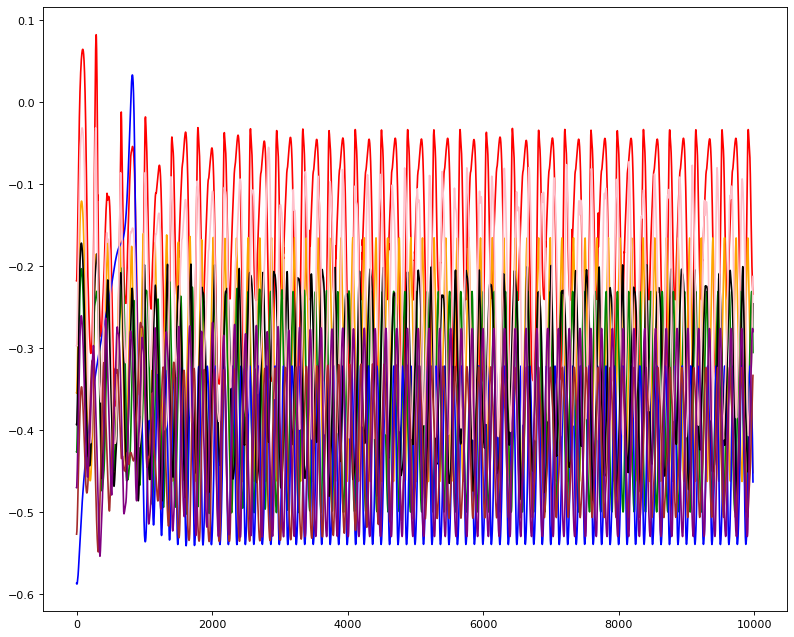

In [40]:
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=80)

plt.plot(input_tensor[0][10:,30].numpy(),color='red',label="30 degree")
plt.plot(input_tensor[1][10:,30].numpy(),color='orange',label="22.5 degree")
plt.plot(input_tensor[2][10:,30].numpy(),color='green',label="18 degree")
plt.plot(input_tensor[3][10:,30].numpy(),color='blue',label="0 degree")
plt.plot(input_tensor[4][10:,30].numpy(),color='black',label="20 degree")
plt.plot(input_tensor[5][10:,30].numpy(),color='pink',label="25.7 degree")
plt.plot(input_tensor[6][10:,30].numpy(),color='brown',label="10 degree")
plt.plot(input_tensor[7][10:,30].numpy(),color='purple',label="12 degree")
plt.show()

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

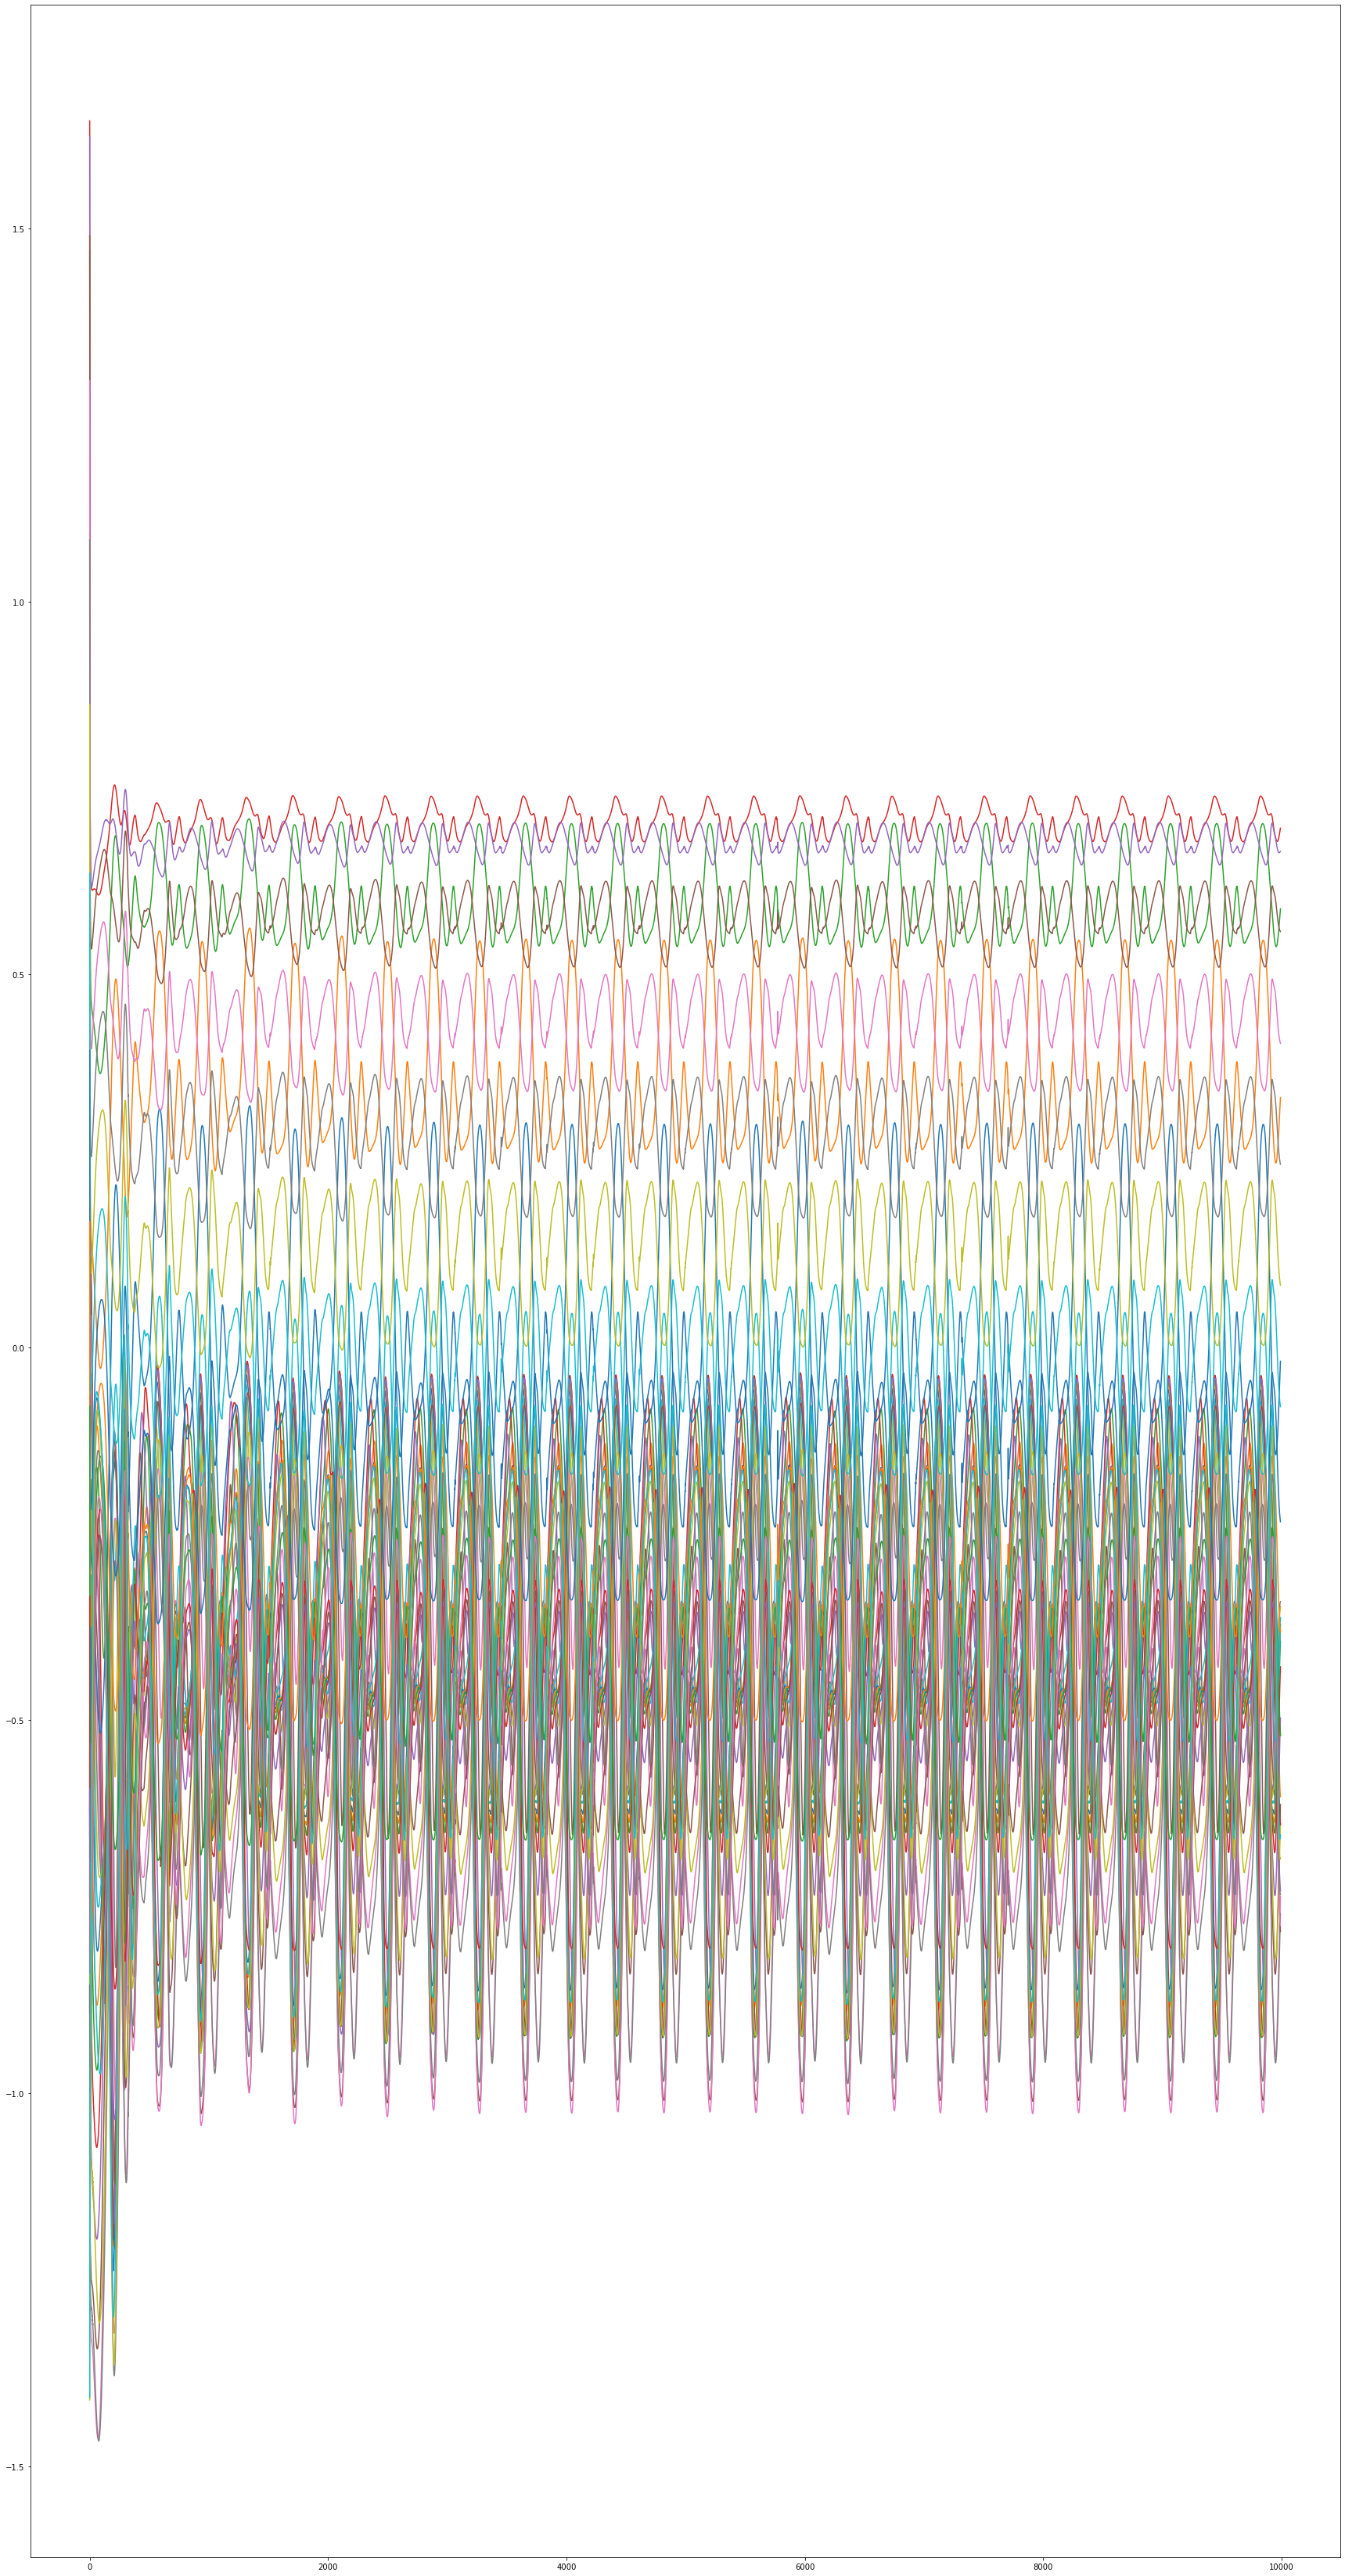

In [50]:
df = pd.DataFrame(input_tensor[0].numpy())
df = df.iloc[1:]
plt.figure()
df.plot(legend=False,figsize=(30,60))

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

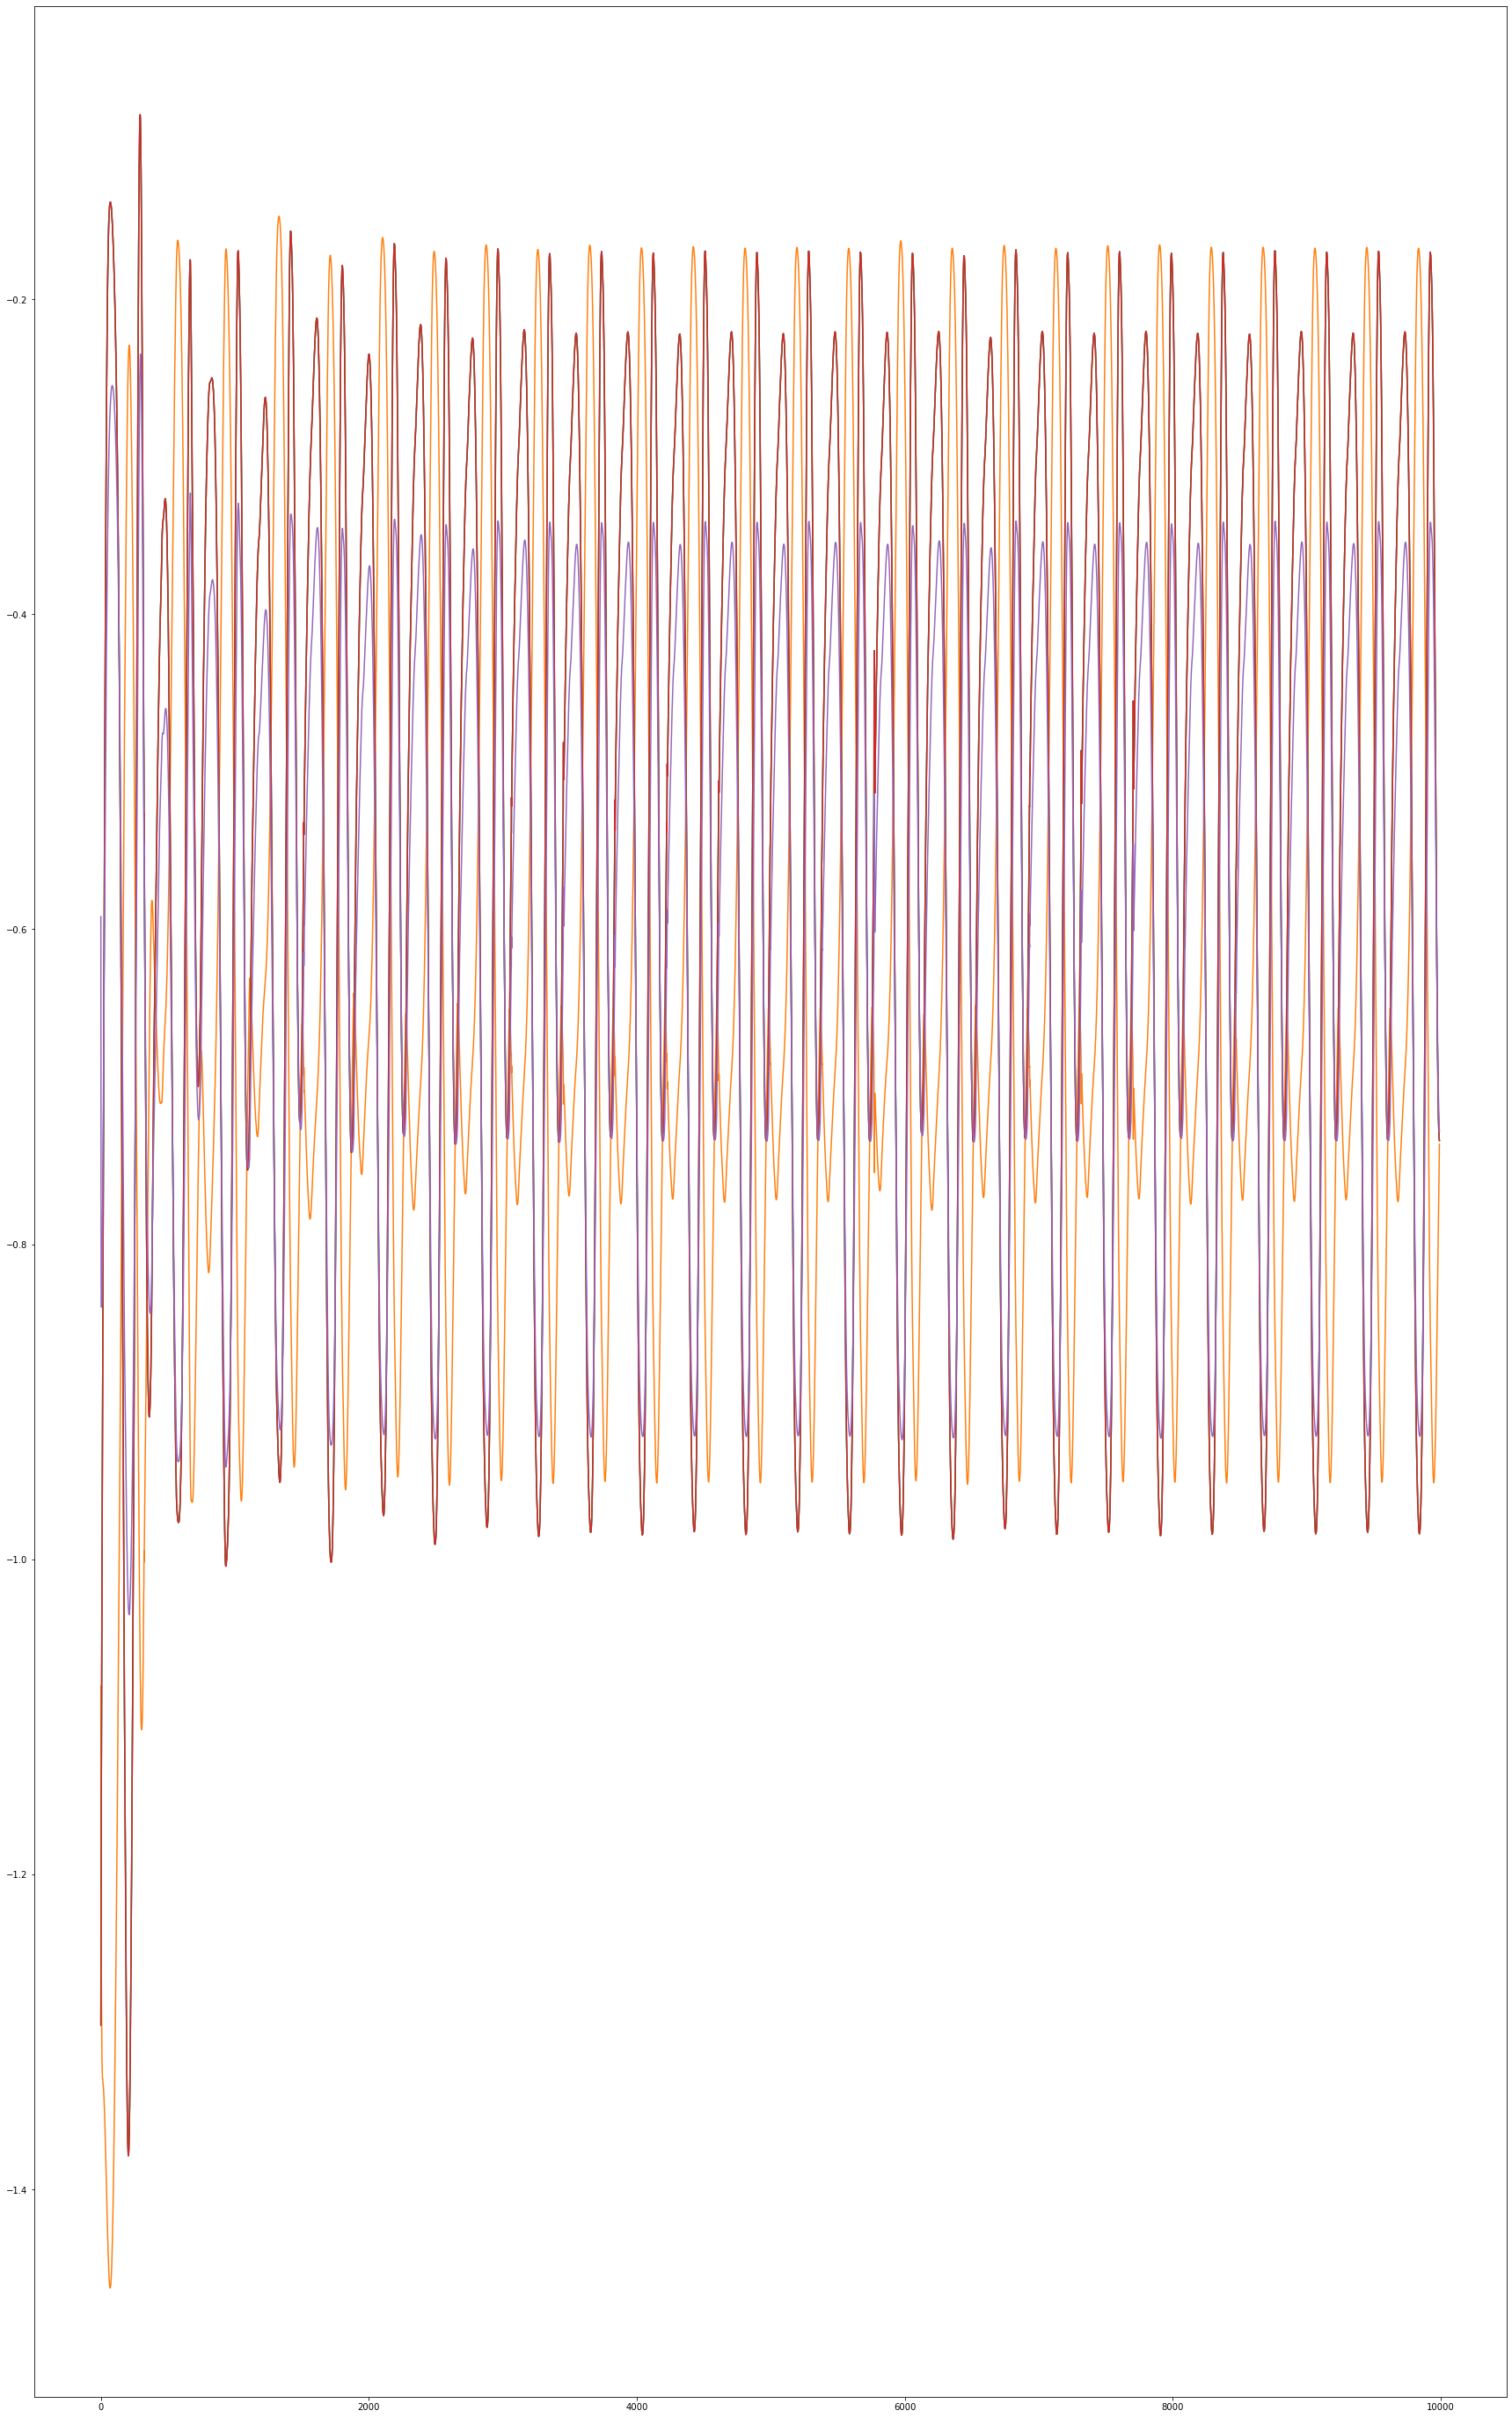

In [51]:
columns = np.random.choice(40,5)
df_few = df.iloc[:,columns]
plt.figure()
df_few.plot(legend=False,figsize=(30,50))

In [75]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1,out_channels=1,kernel_size=(3,40)).cuda()
        self.conv2 = nn.Conv1d(1,1,(5,1)).cuda()
        self.conv3 = nn.Conv1d(1,1,(10,1),stride=2).cuda()
    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        return x

class CNN_LSTM(nn.Module):
    def __init__(self):
        super(CNN_LSTM, self).__init__()
        self.cnn = CNN()
        self.rnn = nn.LSTM(1,64,2,batch_first=True).cuda()
        self.dense1 = nn.Linear(4988,1).cuda()
        self.dense2 = nn.Linear(64,1).cuda()
    def forward(self,x):
        x = self.cnn(x)
        x = torch.squeeze(x,1)
        x = self.rnn(x)[0]
        x = F.relu(x)
        x = torch.transpose(x,1,2)
        x = self.dense1(x)
        x = F.relu(x)
        x = torch.transpose(x,1,2)
        x = self.dense2(x)
        x = F.relu(x)
        print(x)
        return x
    
        
        

In [76]:
loss_f = nn.MSELoss()
target = torch.FloatTensor([30,22.5,18,0,20,25.71,10,15])
model = CNN_LSTM()
optimizer = optim.Adam(model.parameters())
for i in range(8):
    optimizer = optim.Adam(model.parameters())
    train = torch.cat([input_tensor[0:i], input_tensor[i+1:]],0).cuda()
    train = torch.unsqueeze(train,1)
    test = input_tensor[i].cuda()
    train_target = torch.cat([target[0:i], target[i+1:]]).cuda()
    test_target = target[i].cuda()
    optimizer.zero_grad()
    out = model(train)
    loss = loss_f(out,train_target)
    print(loss)
    loss.backward()
    optimizer.step()

tensor([[[0.0652]],

        [[0.0652]],

        [[0.0652]],

        [[0.0652]],

        [[0.0652]],

        [[0.0652]],

        [[0.0652]]], device='cuda:0', grad_fn=<ReluBackward0>)
tensor(314.5415, device='cuda:0', grad_fn=<MseLossBackward>)


C:\Users\17874\anaconda3\envs\recbole\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([[[0.0672]],

        [[0.0672]],

        [[0.0672]],

        [[0.0672]],

        [[0.0672]],

        [[0.0672]],

        [[0.0672]]], device='cuda:0', grad_fn=<ReluBackward0>)
tensor(370.5820, device='cuda:0', grad_fn=<MseLossBackward>)
tensor([[[0.0687]],

        [[0.0687]],

        [[0.0687]],

        [[0.0687]],

        [[0.0687]],

        [[0.0687]],

        [[0.0687]]], device='cuda:0', grad_fn=<ReluBackward0>)
tensor(396.4800, device='cuda:0', grad_fn=<MseLossBackward>)
tensor([[[0.0701]],

        [[0.0701]],

        [[0.0701]],

        [[0.0701]],

        [[0.0701]],

        [[0.0701]],

        [[0.0701]]], device='cuda:0', grad_fn=<ReluBackward0>)
tensor(442.3562, device='cuda:0', grad_fn=<MseLossBackward>)
tensor([[[0.0714]],

        [[0.0714]],

        [[0.0714]],

        [[0.0714]],

        [[0.0714]],

        [[0.0714]],

        [[0.0714]]], device='cuda:0', grad_fn=<ReluBackward0>)
tensor(385.5677, device='cuda:0', grad_fn=<MseLossBackward>)


In [60]:
test.size()
test = torch.unsqueeze(test,0)
test = torch.unsqueeze(test,0)


In [62]:
model(test).size()

torch.Size([1, 4988, 1])